In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

def get_data(result = 'des'):
    total_time = [0 for i in range(20)]
    num = 0
    path = f'results/sudoku_{result}'
    for file in tqdm(os.listdir(path)):
        num += 1
        file_path = os.path.join(path, file)
        with open(file_path) as f:
            # try:
            while f.readline():
                if result == 'des':
                    info = f.readline().strip()
                    time = float(info.split(': ')[-1])
                    info = f.readline().strip()
                    index = int(info.split('_')[-1].split('.')[0])-1
                    total_time[index] += time
                if result == 'choco_des' or result == 'yuck_des':
                    info = f.readline().strip()
                    if info == 'SAT':
                        f.readline()
                        info = f.readline().strip()
                        time = float(info.split(' ')[-2])
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time/1000
                    elif info[:2] == '==':
                        info = f.readline().strip()
                        time = 1000.000
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time
                if result == 'cpl_des':
                    info = f.readline().strip()
                    if info == 'SAT':
                        info = f.readline().strip()
                        time = float(info.split(' ')[-2])
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time/1000
                    elif info[:2] == 'pr':
                        time = 1000.000
                        index = int(info.split('_')[-1].split('.')[0])-1
                        total_time[index] += time
                        
    for i in range(20):
        if total_time[i] == 0:
            total_time[i] = 1000.000
        else:
            total_time[i] /= num

    return total_time

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

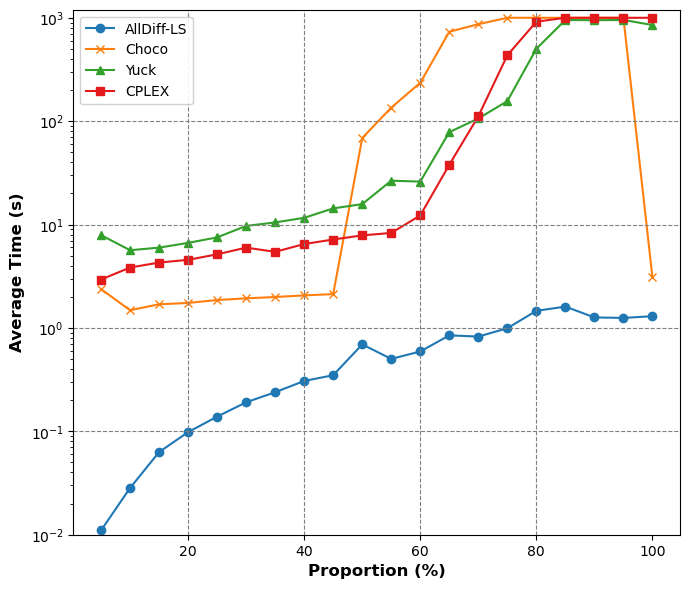

In [10]:
x = [i for i in range(5, 101, 5)]
y1 = get_data('des')
y2 = get_data('choco_des')
y3 = get_data('yuck_des')
y4 = get_data('cpl_des')

import matplotlib.pyplot as plt

# 调整颜色和标记
plt.figure(figsize=(7, 6))  # 增加图像尺寸
plt.plot(x, y1, marker='o', markersize=6, linestyle='-', color='#1f78b4', label='AllDiff-LS')  # 深蓝色，圆形标记
plt.plot(x, y2, marker='x', markersize=6, linestyle='-', color='#ff7f0e', label='Choco')  # 橙色，叉形标记
plt.plot(x, y3, marker='^', markersize=6, linestyle='-', color='#33a02c', label='Yuck')  # 绿色，上三角形标记
plt.plot(x, y4, marker='s', markersize=6, linestyle='-', color='#e31a1c', label='CPLEX')  # 红色，方形标记

# 设置坐标轴范围和对数尺度
plt.ylim(0.01, 1200)
plt.yscale('log')

# 添加网格线和参考线
plt.axhline(y=0.1, linestyle="--", color="gray", linewidth=0.8)
plt.axhline(y=1, linestyle="--", color="gray", linewidth=0.8)
plt.axhline(y=10, linestyle="--", color="gray", linewidth=0.8)
plt.axhline(y=100, linestyle="--", color="gray", linewidth=0.8)

plt.axvline(x=20, linestyle="--", color="gray", linewidth=0.8)
plt.axvline(x=40, linestyle="--", color="gray", linewidth=0.8)
plt.axvline(x=60, linestyle="--", color="gray", linewidth=0.8)
plt.axvline(x=80, linestyle="--", color="gray", linewidth=0.8)

# 设置标签和图例
plt.xlabel('Proportion (%)', fontsize=12, fontweight='bold')
plt.ylabel('Average Time (s)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='upper left', frameon=True, framealpha=0.9)

# 保存图表
plt.tight_layout()  # 自动调整布局
plt.savefig('charts/des_beautified.pdf', bbox_inches='tight')
plt.show()